# ABBA-BABA Test
In this notebook I performed the ABBA-BABA Test using the new outgroup allele counts <b>(see 09112019_outgroup_allele_count_phase2_dataset_creation)</b> and the new allele count dataset for the phase2.

I have used part of <b>Alistair's notebook (20150529 Admixture, introgression.ipynb)</b> on the Ag1000G github repository

In [54]:
%run imports.ipynb

In [55]:
chromosomes = ['3L', '3R', '2L', '2R', 'X']

In [56]:
out_species = ['arab', 'chri', 'epir', 'mela', 'meru', 'quad']

In [57]:
an_col = 'AOcol', 'BFcol', 'CIcol', 'GHcol', 'GNcol'
an_gam = 'GHgam', 'CMgam', 'BFgam', 'GNgam', 'GQgam', 'UGgam', 'GAgam', 'FRgam'
an_na = 'KE', 'GM', 'GW'

In [58]:
calldata_out= zarr.open('data/outgroup_alleles_phase2.zarr')
calldata_out.tree()

/
 ├── 2L
 │   ├── arab (8906423, 2) int32
 │   ├── chri (8906423, 2) int32
 │   ├── epir (8906423, 2) int32
 │   ├── mela (8906423, 2) int32
 │   ├── meru (8906423, 2) int32
 │   └── quad (8906423, 2) int32
 ├── 2R
 │   ├── arab (12047846, 2) int32
 │   ├── chri (12047846, 2) int32
 │   ├── epir (12047846, 2) int32
 │   ├── mela (12047846, 2) int32
 │   ├── meru (12047846, 2) int32
 │   └── quad (12047846, 2) int32
 ├── 3L
 │   ├── arab (7897666, 2) int32
 │   ├── chri (7897666, 2) int32
 │   ├── epir (7897666, 2) int32
 │   ├── mela (7897666, 2) int32
 │   ├── meru (7897666, 2) int32
 │   └── quad (7897666, 2) int32
 ├── 3R
 │   ├── arab (10752701, 2) int32
 │   ├── chri (10752701, 2) int32
 │   ├── epir (10752701, 2) int32
 │   ├── mela (10752701, 2) int32
 │   ├── meru (10752701, 2) int32
 │   └── quad (10752701, 2) int32
 └── X
     ├── arab (4472265, 2) int32
     ├── chri (4472265, 2) int32
     ├── epir (4472265, 2) int32
     ├── mela (4472265, 2) int32
     ├── meru (4472265, 2) int32
     └── quad (4472265, 2) int32

In [59]:
calldata_biallel= zarr.open('data/phase2_allele_count.zarr')
calldata_biallel.tree()

/
 ├── 2L
 │   ├── AOcol (8906423, 2) int32
 │   ├── BFcol (8906423, 2) int32
 │   ├── BFgam (8906423, 2) int32
 │   ├── CIcol (8906423, 2) int32
 │   ├── CMgam (8906423, 2) int32
 │   ├── FRgam (8906423, 2) int32
 │   ├── GAgam (8906423, 2) int32
 │   ├── GHcol (8906423, 2) int32
 │   ├── GHgam (8906423, 2) int32
 │   ├── GM (8906423, 2) int32
 │   ├── GNcol (8906423, 2) int32
 │   ├── GNgam (8906423, 2) int32
 │   ├── GQgam (8906423, 2) int32
 │   ├── GW (8906423, 2) int32
 │   ├── KE (8906423, 2) int32
 │   └── UGgam (8906423, 2) int32
 ├── 2R
 │   ├── AOcol (12047846, 2) int32
 │   ├── BFcol (12047846, 2) int32
 │   ├── BFgam (12047846, 2) int32
 │   ├── CIcol (12047846, 2) int32
 │   ├── CMgam (12047846, 2) int32
 │   ├── FRgam (12047846, 2) int32
 │   ├── GAgam (12047846, 2) int32
 │   ├── GHcol (12047846, 2) int32
 │   ├── GHgam (12047846, 2) int32
 │   ├── GM (12047846, 2) int32
 │   ├── GNcol (12047846, 2) int32
 │   ├── GNgam (12047846, 2) int32
 │   ├── GQgam (12047846, 2) int32
 │   ├── GW (12047846, 2) int32
 │   ├── KE (12047846, 2) int32
 │   └── UGgam (12047846, 2) int32
 ├── 3L
 │   ├── AOcol (7897666, 2) int32
 │   ├── BFcol (7897666, 2) int32
 │   ├── BFgam (7897666, 2) int32
 │   ├── CIcol (7897666, 2) int32
 │   ├── CMgam (7897666, 2) int32
 │   ├── FRgam (7897666, 2) int32
 │   ├── GAgam (7897666, 2) int32
 │   ├── GHcol (7897666, 2) int32
 │   ├── GHgam (7897666, 2) int32
 │   ├── GM (7897666, 2) int32
 │   ├── GNcol (7897666, 2) int32
 │   ├── GNgam (7897666, 2) int32
 │   ├── GQgam (7897666, 2) int32
 │   ├── GW (7897666, 2) int32
 │   ├── KE (7897666, 2) int32
 │   └── UGgam (7897666, 2) int32
 ├── 3R
 │   ├── AOcol (10752701, 2) int32
 │   ├── BFcol (10752701, 2) int32
 │   ├── BFgam (10752701, 2) int32
 │   ├── CIcol (10752701, 2) int32
 │   ├── CMgam (10752701, 2) int32
 │   ├── FRgam (10752701, 2) int32
 │   ├── GAgam (10752701, 2) int32
 │   ├── GHcol (10752701, 2) int32
 │   ├── GHgam (10752701, 2) int32
 │   ├── GM (10752701, 2) int32
 │   ├── GNcol (10752701, 2) int32
 │   ├── GNgam (10752701, 2) int32
 │   ├── GQgam (10752701, 2) int32
 │   ├── GW (10752701, 2) int32
 │   ├── KE (10752701, 2) int32
 │   └── UGgam (10752701, 2) int32
 └── X
     ├── AOcol (4472265, 2) int32
     ├── BFcol (4472265, 2) int32
     ├── BFgam (4472265, 2) int32
     ├── CIcol (4472265, 2) int32
     ├── CMgam (4472265, 2) int32
     ├── FRgam (4472265, 2) int32
     ├── GAgam (4472265, 2) int32
     ├── GHcol (4472265, 2) int32
     ├── GHgam (4472265, 2) int32
     ├── GM (4472265, 2) int32
     ├── GNcol (4472265, 2) int32
     ├── GNgam (4472265, 2) int32
     ├── GQgam (4472265, 2) int32
     ├── GW (4472265, 2) int32
     ├── KE (4472265, 2) int32
     └── UGgam (4472265, 2) int32

In [62]:
metadata = pd.read_csv("samples.meta.txt", sep="\t")
metadata.head()

,ox_code,src_code,population,country,location,site,contributor,contact,year,m_s,sex,n_sequences,mean_coverage,ebi_sample_acc,latitude,longitude
0,AA0040-C,Twifo_Praso__E2,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95033368,30.99,ERS311878,5.60858,-1.54926
1,AA0041-C,Twifo_Praso__H3,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95843804,31.70,ERS311886,5.60858,-1.54926
2,AA0042-C,Takoradi_C7,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,107420666,35.65,ERS311894,4.91217,-1.77397
3,AA0043-C,Takoradi_H8,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,95993752,29.46,ERS311902,4.91217,-1.77397
4,AA0044-C,Takoradi_D10,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,103044262,33.67,ERS311910,4.91217,-1.77397


In [63]:
ac_cache = dict()

def load_ac(chrom, pop):
    if (chrom, pop) in ac_cache:
        return ac_cache[chrom, pop]
    else:
        if pop in out_species:
            ac = calldata_out[chrom][pop]
        else:
            ac = calldata_biallel[chrom][pop]
            ac_cache[chrom, pop] = ac
        return ac

In [64]:
fourpop_cache = dict()

In [65]:
def f4_analysis(chrom, A, B, C, D, blen=100000, plot=False, ax=None):
    
    key = (chrom, A, B, C, D, blen)
    if key in fourpop_cache:
        # re-use from cache
        d, d_se, d_z, d_vb, d_vj = fourpop_cache[key]
        
    else:
        # load allele counts
        aca = load_ac(chrom, A)
        acb = load_ac(chrom, B)
        acc = load_ac(chrom, C)
        acd = load_ac(chrom, D)

        # run D test
        d, d_se, d_z, d_vb, d_vj = allel.blockwise_patterson_d(aca, acb, acc, acd, blen=blen)
        
        # cache for re-use
        fourpop_cache[key] = d, d_se, d_z, d_vb, d_vj
    
    return d, d_se, d_z, d_vb, d_vj


def f4_analyses(As, Bs, Cs, Ds, chroms=chromosomes, blen=100000):
    
    # normalise inputs
    if not isinstance(chroms, (list, tuple)):
        chroms = [chroms]
    if not isinstance(As, (list, tuple)):
        As = [As]
    if not isinstance(Bs, (list, tuple)):
        Bs = [Bs]
    if not isinstance(Cs, (list, tuple)):
        Cs = [Cs]
    if not isinstance(Ds, (list, tuple)):
        Ds = [Ds]
        
    # setup output table
    tbl = [['chromosome', 'test', 'D', 'SE', 'Z']]
    for chrom in chroms:
        for A in As:
            for B in Bs:
                if A != B:
                    for C in Cs:
                        for D in Ds:
                            if C != D:
                                d, d_se, d_z, _, _ = f4_analysis(chrom, A, B, C, D, blen=blen)
                                test = 'D(%s, %s; %s, %s)' % (A, B, C, D)
                                row = [chrom, test, d, d_se, d_z]
                                tbl += [row]
    
    # display results
    (etl
     .wrap(tbl)
     .interpolate('D', '%.3f')
     .interpolate('SE', '%.4f')
     .interpolate('Z', '%.1f')
     .displayall(index_header=False, tr_style=lambda row: 'background-color: %s' % ('#afa' if float(row.Z) > 5 else '#aaf' if float(row.Z) < -5 else 'white')))

    
def f4_plot(chrom, A, B, C, D, blen=100000, ax=None, ylim=(-.6, .6)):
    d, d_se, d_z, d_vb, d_vj = f4_analysis(chrom, A, B, C, D, blen=blen)

    # load variant positions
    pos = callset_biallel[chrom]['variants']['POS'][:]

    block_starts = allel.moving_statistic(pos, statistic=np.min, size=blen)
    block_stops = allel.moving_statistic(pos, statistic=np.max, size=blen)
    block_widths = block_stops - block_starts

    if ax is None:
        fig, ax = subplots(figsize=(7, 2))
    ax.bar(block_starts, d_vb, width=block_widths, linewidth=0)
    ax.axhline(0, color='k', linestyle='--')
    ax.set_ylabel('D', rotation=0, ha='center', va='center')
    ax.set_ylim(*ylim)
    
    return ax

    
def f4_fig(A, B, C, D, blen=100000, ylim=(-.6, .6)):
    gf = GenomeFigure(genome, figsize=(8, 5))
    gf.apply(lambda chrom, ax: f4_plot(chrom, A, B, C, D, ax=ax, ylim=ylim))
    gf.fig.suptitle('D(%s, %s; %s, %s)' % (A, B, C, D), fontsize=12, fontweight='bold')
    gf.fig.tight_layout()
    return gf


In [66]:
A = 'mela'
B = 'quad'
C = 'meru'
D = 'chri', 'epir'
f4_analyses(A, B, C, D)

chromosome,test,D,SE,Z
3L,"D(mela, quad; meru, chri)",-0.332,0.0194,-17.1
3L,"D(mela, quad; meru, epir)",-0.299,0.0189,-15.9
3R,"D(mela, quad; meru, chri)",-0.165,0.0119,-13.9
3R,"D(mela, quad; meru, epir)",-0.132,0.0116,-11.3
2L,"D(mela, quad; meru, chri)",-0.150,0.0099,-15.2
2L,"D(mela, quad; meru, epir)",-0.123,0.0095,-12.9
2R,"D(mela, quad; meru, chri)",-0.115,0.0084,-13.6
2R,"D(mela, quad; meru, epir)",-0.077,0.0092,-8.3
X,"D(mela, quad; meru, chri)",-0.150,0.0136,-11.1
X,"D(mela, quad; meru, epir)",-0.114,0.0139,-8.1


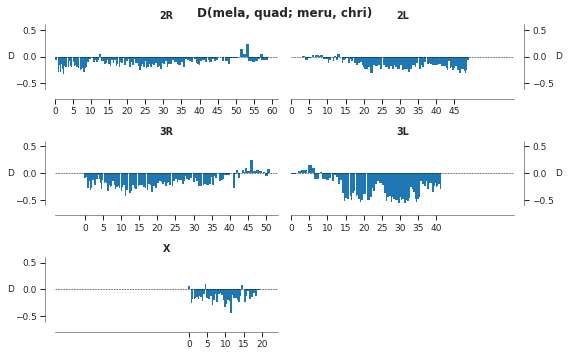

In [41]:
'mela', 'quad', 'meru', 'chri'
f4_fig(A, B, C, D)

-----------------------------------------

## ABBA-BABA Test with Mayotte

### Using <i>An.christyi</i> as outgroup:

In [30]:
A = an_gam
B = 'FRgam'
C = an_col
D = 'chri'

In [31]:
f4_analyses(A, B, C, D)

chromosome,test,D,SE,Z
3L,"D(GHgam, FRgam; AOcol, chri)",-0.008,0.0050,-1.6
3L,"D(GHgam, FRgam; BFcol, chri)",0.002,0.0042,0.5
3L,"D(GHgam, FRgam; CIcol, chri)",0.005,0.0041,1.2
3L,"D(GHgam, FRgam; GHcol, chri)",0.005,0.0040,1.2
3L,"D(GHgam, FRgam; GNcol, chri)",0.005,0.0042,1.1
3L,"D(CMgam, FRgam; AOcol, chri)",-0.010,0.0051,-2.0
3L,"D(CMgam, FRgam; BFcol, chri)",-0.003,0.0043,-0.6
3L,"D(CMgam, FRgam; CIcol, chri)",-0.002,0.0044,-0.4
3L,"D(CMgam, FRgam; GHcol, chri)",-0.002,0.0045,-0.4
3L,"D(CMgam, FRgam; GNcol, chri)",-0.001,0.0045,-0.3


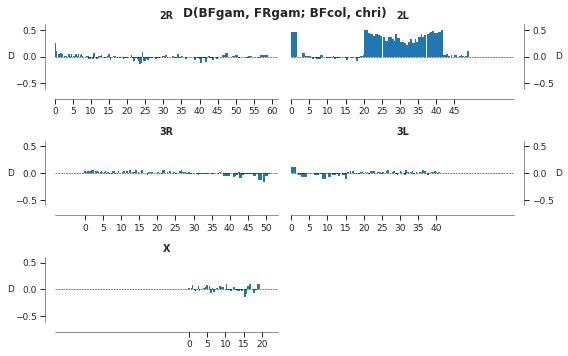

In [42]:
A,B,C,D = 'BFgam', 'FRgam', 'BFcol', 'chri'
f4_fig(A, B, C, D)

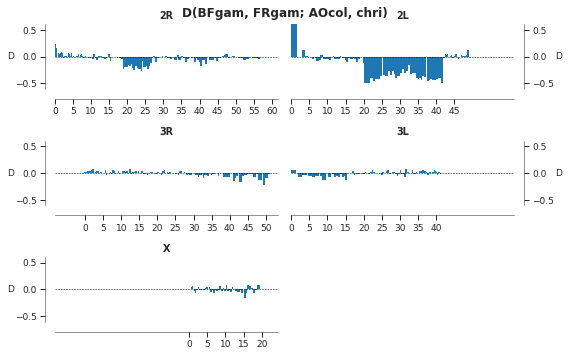

In [43]:
A,B,C,D = 'BFgam', 'FRgam', 'AOcol', 'chri'
f4_fig(A, B, C, D)

### Using <i>An.melas</i> as outgroup:

In [36]:
A = an_gam
B = 'FRgam'
C = an_col
D = 'mela'

In [37]:
f4_analyses(A, B, C, D)

chromosome,test,D,SE,Z
3L,"D(GHgam, FRgam; AOcol, mela)",-0.015,0.0060,-2.5
3L,"D(GHgam, FRgam; BFcol, mela)",-0.000,0.0050,-0.0
3L,"D(GHgam, FRgam; CIcol, mela)",0.002,0.0048,0.5
3L,"D(GHgam, FRgam; GHcol, mela)",0.002,0.0047,0.5
3L,"D(GHgam, FRgam; GNcol, mela)",0.003,0.0051,0.6
3L,"D(CMgam, FRgam; AOcol, mela)",-0.017,0.0060,-2.8
3L,"D(CMgam, FRgam; BFcol, mela)",-0.006,0.0052,-1.2
3L,"D(CMgam, FRgam; CIcol, mela)",-0.005,0.0052,-1.0
3L,"D(CMgam, FRgam; GHcol, mela)",-0.005,0.0052,-1.0
3L,"D(CMgam, FRgam; GNcol, mela)",-0.004,0.0053,-0.7


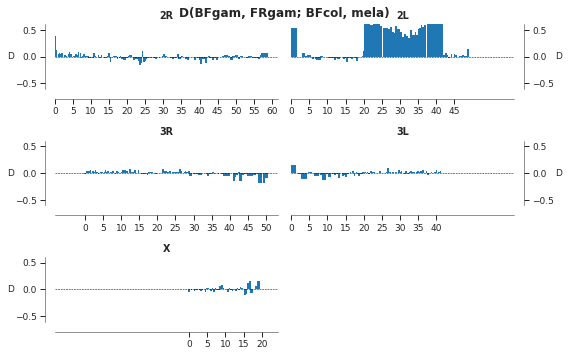

In [44]:
A,B,C,D = 'BFgam', 'FRgam', 'BFcol', 'mela'
f4_fig(A, B, C, D)

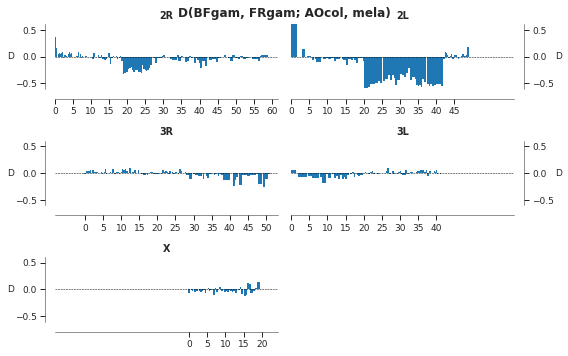

In [45]:
A,B,C,D = 'BFgam', 'FRgam', 'AOcol', 'mela'
f4_fig(A, B, C, D)

--------------------------------------------

## ABBA-BABA Test Analysis with Gabon

### Using <i>An.christyi</i> as outgroup

In [32]:
A = an_gam
B = 'GAgam'
C = an_col
D = 'chri'

In [33]:
f4_analyses(A, B, C, D)

chromosome,test,D,SE,Z
3L,"D(GHgam, GAgam; AOcol, chri)",-0.024,0.0036,-6.5
3L,"D(GHgam, GAgam; BFcol, chri)",-0.006,0.0026,-2.4
3L,"D(GHgam, GAgam; CIcol, chri)",-0.006,0.0024,-2.4
3L,"D(GHgam, GAgam; GHcol, chri)",-0.006,0.0024,-2.6
3L,"D(GHgam, GAgam; GNcol, chri)",-0.006,0.0026,-2.2
3L,"D(CMgam, GAgam; AOcol, chri)",-0.026,0.0036,-7.2
3L,"D(CMgam, GAgam; BFcol, chri)",-0.011,0.0026,-4.3
3L,"D(CMgam, GAgam; CIcol, chri)",-0.012,0.0027,-4.6
3L,"D(CMgam, GAgam; GHcol, chri)",-0.013,0.0027,-4.8
3L,"D(CMgam, GAgam; GNcol, chri)",-0.012,0.0027,-4.4


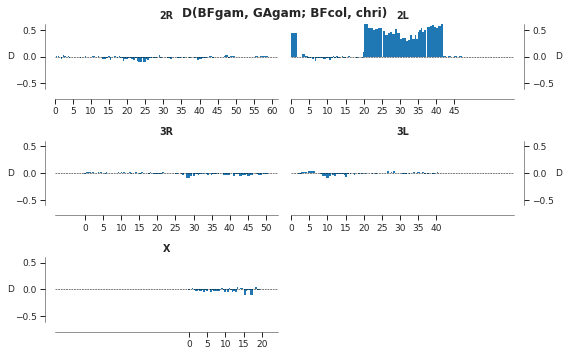

In [46]:
A,B,C,D = 'BFgam', 'GAgam', 'BFcol', 'chri'
f4_fig(A, B, C, D)

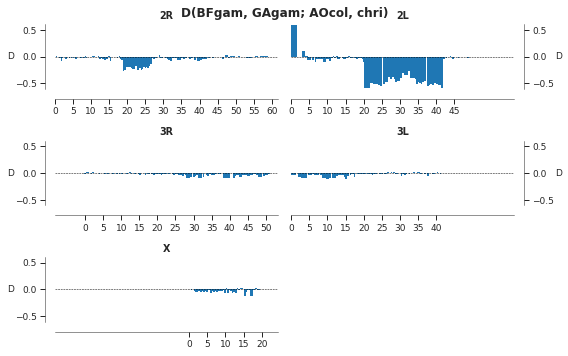

In [47]:
A,B,C,D = 'BFgam', 'GAgam', 'AOcol', 'chri'
f4_fig(A, B, C, D)

### Using <i>An.melas</i> as outgroup:

In [38]:
A = an_gam
B = 'FRgam'
C = an_col
D = 'mela'

In [39]:
f4_analyses(A, B, C, D)

chromosome,test,D,SE,Z
3L,"D(GHgam, FRgam; AOcol, mela)",-0.015,0.0060,-2.5
3L,"D(GHgam, FRgam; BFcol, mela)",-0.000,0.0050,-0.0
3L,"D(GHgam, FRgam; CIcol, mela)",0.002,0.0048,0.5
3L,"D(GHgam, FRgam; GHcol, mela)",0.002,0.0047,0.5
3L,"D(GHgam, FRgam; GNcol, mela)",0.003,0.0051,0.6
3L,"D(CMgam, FRgam; AOcol, mela)",-0.017,0.0060,-2.8
3L,"D(CMgam, FRgam; BFcol, mela)",-0.006,0.0052,-1.2
3L,"D(CMgam, FRgam; CIcol, mela)",-0.005,0.0052,-1.0
3L,"D(CMgam, FRgam; GHcol, mela)",-0.005,0.0052,-1.0
3L,"D(CMgam, FRgam; GNcol, mela)",-0.004,0.0053,-0.7


--------------------------

## ABBA-BABA Test with hybrid populations:

### Using <i>An.christyi</i> as outgroup:

In [44]:
A = an_gam
B = an_na
C = an_col
D = 'chri'

In [45]:
f4_analyses(A, B, C, D)

chromosome,test,D,SE,Z
3L,"D(GHgam, KE; AOcol, chri)",-0.015,0.0056,-2.8
3L,"D(GHgam, KE; BFcol, chri)",-0.020,0.0049,-4.0
3L,"D(GHgam, KE; CIcol, chri)",-0.023,0.0047,-4.9
3L,"D(GHgam, KE; GHcol, chri)",-0.026,0.0046,-5.6
3L,"D(GHgam, KE; GNcol, chri)",-0.022,0.0051,-4.4
3L,"D(GHgam, GM; AOcol, chri)",0.020,0.0063,3.1
3L,"D(GHgam, GM; BFcol, chri)",0.000,0.0067,0.0
3L,"D(GHgam, GM; CIcol, chri)",-0.010,0.0068,-1.5
3L,"D(GHgam, GM; GHcol, chri)",-0.008,0.0072,-1.2
3L,"D(GHgam, GM; GNcol, chri)",-0.022,0.0069,-3.3


### Using <i>An.melas</i> as outgroup:

In [44]:
A = an_gam
B = an_na
C = an_col
D = 'mela'

In [46]:
f4_analyses(A,B,C,D)

chromosome,test,D,SE,Z
3L,"D(GHgam, KE; AOcol, chri)",-0.015,0.0056,-2.8
3L,"D(GHgam, KE; BFcol, chri)",-0.020,0.0049,-4.0
3L,"D(GHgam, KE; CIcol, chri)",-0.023,0.0047,-4.9
3L,"D(GHgam, KE; GHcol, chri)",-0.026,0.0046,-5.6
3L,"D(GHgam, KE; GNcol, chri)",-0.022,0.0051,-4.4
3L,"D(GHgam, GM; AOcol, chri)",0.020,0.0063,3.1
3L,"D(GHgam, GM; BFcol, chri)",0.000,0.0067,0.0
3L,"D(GHgam, GM; CIcol, chri)",-0.010,0.0068,-1.5
3L,"D(GHgam, GM; GHcol, chri)",-0.008,0.0072,-1.2
3L,"D(GHgam, GM; GNcol, chri)",-0.022,0.0069,-3.3


------------------------------------------

----------------------------------

## Representing ABBA-BABA Test for each block with its mean and percentile:

In [17]:
def f4_blocks(As, Bs, Cs, Ds, chroms=chromosomes, blen=100000):
    
    # normalise inputs
    if not isinstance(chroms, (list, tuple)):
        chroms = [chroms]
    if not isinstance(As, (list, tuple)):
        As = [As]
    if not isinstance(Bs, (list, tuple)):
        Bs = [Bs]
    if not isinstance(Cs, (list, tuple)):
        Cs = [Cs]
    if not isinstance(Ds, (list, tuple)):
        Ds = [Ds]
        
    # setup output table
    tbl = []
    for chrom in chroms:
        for A in As:
            for B in Bs:
                if A != B:
                    for C in Cs:
                        for D in Ds:
                            if C != D:
                                d, d_se, d_z, b1, _ = f4_analysis(chrom, A, B, C, D, blen=blen)
                                test = 'D(%s, %s; %s, %s)' % (A, B, C, D)
                                row = b1
                                tbl += [row]
    np.array(tbl)
    # display results
    return tbl

In [18]:
A = an_gam
B = 'FRgam'
C = an_col
D = 'chri'

In [19]:
an_1 = f4_analyses(A,B,C,D, chroms=['3L','3R'])

chromosome,test,D,SE,Z
3L,"D(GHgam, FRgam; AOcol, chri)",-0.008,0.0050,-1.6
3L,"D(GHgam, FRgam; BFcol, chri)",0.002,0.0042,0.5
3L,"D(GHgam, FRgam; CIcol, chri)",0.005,0.0041,1.2
3L,"D(GHgam, FRgam; GHcol, chri)",0.005,0.0040,1.2
3L,"D(GHgam, FRgam; GNcol, chri)",0.005,0.0042,1.1
3L,"D(CMgam, FRgam; AOcol, chri)",-0.010,0.0051,-2.0
3L,"D(CMgam, FRgam; BFcol, chri)",-0.003,0.0043,-0.6
3L,"D(CMgam, FRgam; CIcol, chri)",-0.002,0.0044,-0.4
3L,"D(CMgam, FRgam; GHcol, chri)",-0.002,0.0045,-0.4
3L,"D(CMgam, FRgam; GNcol, chri)",-0.001,0.0045,-0.3


In [20]:
fr_test = np.array(f4_blocks(A,B,C,D, chroms='3R'))
(fr_test)

array([[ 0.0009231 ,  0.01245865,  0.03027979, ..., -0.16502648,
        -0.08065299, -0.00968134],
       [ 0.01871958,  0.01835723,  0.02725292, ..., -0.11720751,
        -0.05652404,  0.01439544],
       [ 0.01744616,  0.01775163,  0.02805659, ..., -0.10292529,
        -0.04601996, -0.00016981],
       ...,
       [ 0.0365545 ,  0.00200658,  0.01736285, ..., -0.14905504,
        -0.04862846, -0.01734889],
       [ 0.04114178,  0.00434723,  0.01542045, ..., -0.15509838,
        -0.04930323, -0.02091729],
       [ 0.04474766, -0.00347464,  0.02422379, ..., -0.15488245,
        -0.04671865, -0.01741781]])

In [21]:
fr_test_min = fr_test.min(axis=0)
len(fr_test_min)

107

In [22]:
fr_test_max = fr_test.max(axis=0)
len(fr_test_max)

107

In [23]:
np.percentile(fr_test, 5, axis=0)

array([ 0.01801015,  0.00248158,  0.01757392,  0.00289008,  0.01202029,
        0.03996262,  0.03214939, -0.00265937,  0.01714417,  0.02634884,
       -0.00030414, -0.01523679,  0.00648311,  0.02008047, -0.00180045,
        0.00732016,  0.03694041, -0.049468  ,  0.00239743, -0.02502129,
        0.00066941, -0.02544376,  0.0402229 ,  0.02614062, -0.03177441,
       -0.00940579,  0.0218576 , -0.01638389, -0.02157436,  0.0147447 ,
        0.02533307, -0.01065691,  0.01843007,  0.04010148, -0.01681971,
        0.00415033,  0.01033546,  0.03365942,  0.00857228, -0.01443957,
        0.03435166, -0.01435544, -0.02122233, -0.05240056, -0.00893503,
       -0.00288047,  0.01147455, -0.01568008, -0.03417296,  0.0111699 ,
       -0.01053393, -0.03242862,  0.02940413,  0.03665531, -0.01729531,
        0.01710114, -0.03070982,  0.00946083, -0.01549366, -0.00318779,
       -0.044242  , -0.01384054, -0.03604151,  0.02159576,  0.02354695,
       -0.00830303,  0.00910177, -0.01158031, -0.08395418, -0.02

findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['arial'] not found. Falling back to DejaVu Sans.


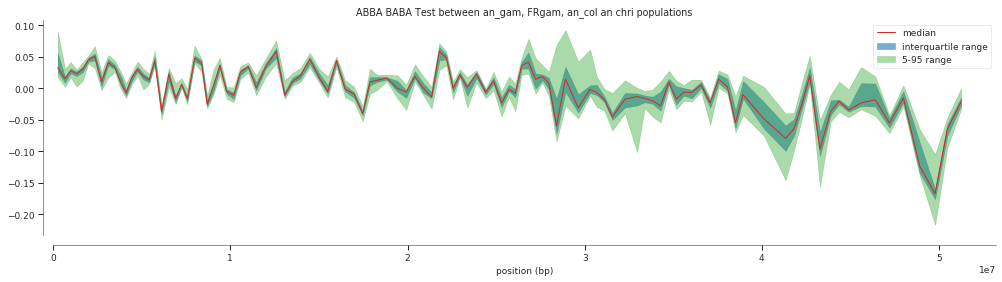

In [26]:
    fig, ax = plt.subplots(figsize=(14, 4))
    # median
    pos = callset_biallel['3R']['variants']['POS'][:]
    windows = allel.moving_statistic(pos, statistic=lambda v: [v[0], v[-1]], size=100000)
    x = np.asarray(windows).mean(axis=1)    
    y = np.median(fr_test, axis=0)
    plt.plot(x, y, lw=1, label = "median", color=palette[3]) 

    
    # interquartile range
    y1 = np.percentile(fr_test, 25, axis=0)
    y2 = np.percentile(fr_test, 75, axis=0)
    ax.fill_between(x, y1, y2, label = "interquartile range", color=palette[0], alpha=.6)
    # 5-95 range
    y3 = np.percentile(fr_test, 5, axis=0)
    y4 = np.percentile(fr_test, 95, axis=0)
    ax.fill_between(x, y3, y4,label = "5-95 range", color=palette[2], alpha=.4)
    ax.set_title('ABBA BABA Test between an_gam, FRgam, an_col an chri populations')
    sns.despine(ax=ax, offset=10)
    ax.set_xlim(0, pos.max())
    ax.set_xlabel('position (bp)')
    #ax.set_ylim(0,0.018)
    sns.despine(ax=ax, offset=10)
    fig.tight_layout()

    # show a legend on the plot 
    plt.legend() 

    # function to show the plot 
    plt.show()

-------------------------------------------------------------

## Creating the function:

In [70]:
def plot_test(chroms, As,Bs,Cs,Ds, blen=100000):
    # normalise inputs
    if not isinstance(chroms, (list, tuple)):
        chroms = [chroms]
    if not isinstance(As, (list, tuple)):
        As = [As]
    if not isinstance(Bs, (list, tuple)):
        Bs = [Bs]
    if not isinstance(Cs, (list, tuple)):
        Cs = [Cs]
    if not isinstance(Ds, (list, tuple)):
        Ds = [Ds]
        
    tbl = []
    for chrom in chroms:
        for A in As:
            for B in Bs:
                if A != B:
                    for C in Cs:
                        for D in Ds:
                            if C != D:
                                d, d_se, d_z, b1, _ = f4_analysis(chrom, A, B, C, D, blen=blen)
                                test = 'D(%s, %s; %s, %s)' % (A, B, C, D)
                                row = b1
                                tbl += [row]
    tbl=np.array(tbl)
    #print (tbl)
    fig, ax = plt.subplots(figsize=(14, 4))
    # median
    pos = callset_biallel[chrom]['variants']['POS'][:]
    windows = allel.moving_statistic(pos, statistic=lambda v: [v[0], v[-1]], size=blen)
    x = np.asarray(windows).mean(axis=1)    
    y = np.median(tbl, axis=0)
    plt.plot(x, y, lw=1, label = "median", color=palette[3]) 

    
    # interquartile range
    y1 = np.percentile(tbl, 25, axis=0)
    y2 = np.percentile(tbl, 75, axis=0)
    ax.fill_between(x, y1, y2, label = "interquartile range", color=palette[0], alpha=.6)
    # 5-95 range
    y3 = np.percentile(tbl, 5, axis=0)
    y4 = np.percentile(tbl, 95, axis=0)
    ax.fill_between(x, y3, y4,label = "5-95 range", color=palette[2], alpha=.4)
    ax.set_title(('ABBA BABA Test between Agam, %s, Acol and %s populations on chromosome %s') % (B,D, chrom))
    sns.despine(ax=ax, offset=10)
    ax.set_xlim(0, pos.max())
    ax.set_xlabel('position (bp)')
    #ax.set_ylim(0,0.018)
    sns.despine(ax=ax, offset=10)
    fig.tight_layout()
    # show a legend on the plot 
    plt.legend() 

    # function to show the plot 
    plt.show()

-----------------------------------------------------------

# Block analysis with Mayotte
## Using An.christyi as outgroup:
 

In [42]:
A = an_gam
B = 'FRgam'
C = an_col
D = 'chri'

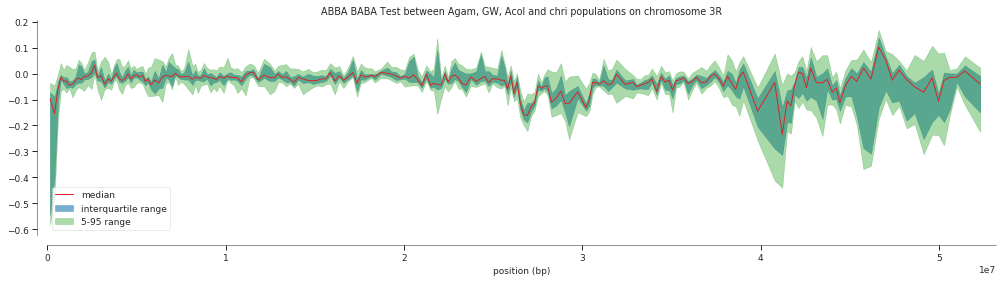

In [71]:
plot_test('3R', A,B,C,D, blen=50000)

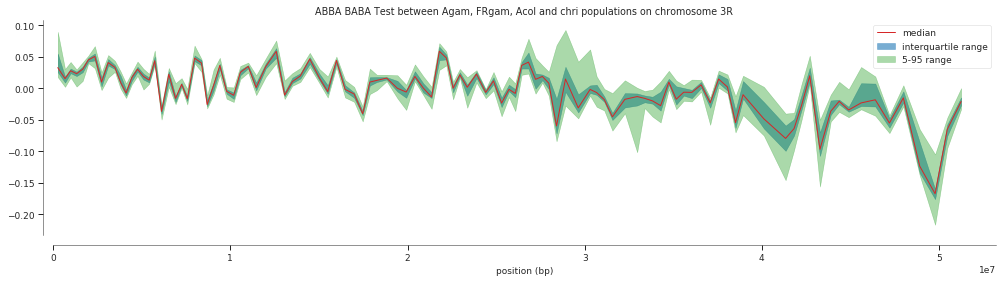

In [43]:
plot_test('3R', A,B,C,D, blen=100000)

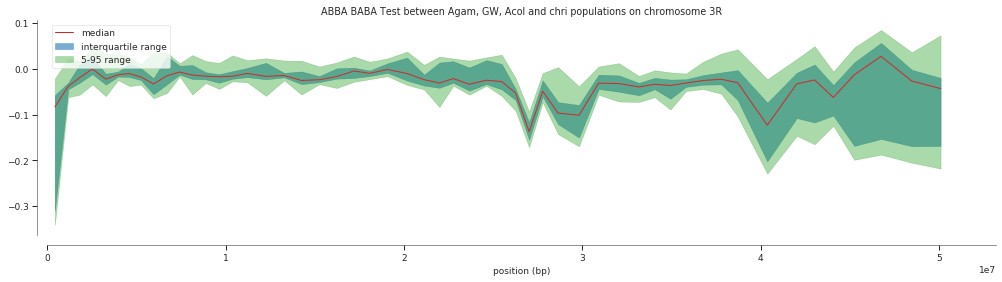

In [72]:
plot_test('3R', A,B,C,D, blen=200000)

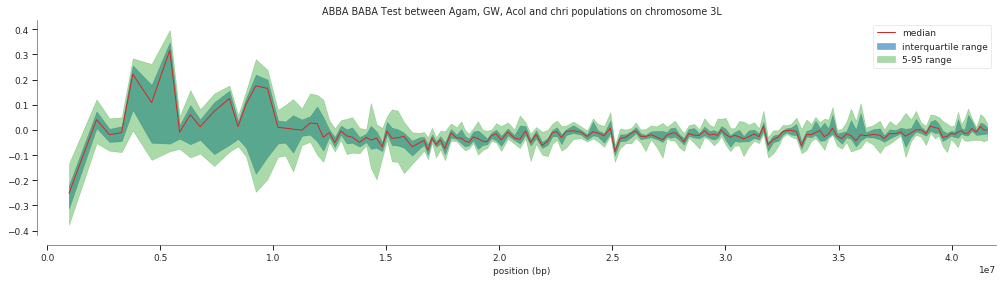

In [75]:
plot_test('3L', A,B,C,D, blen=50000)

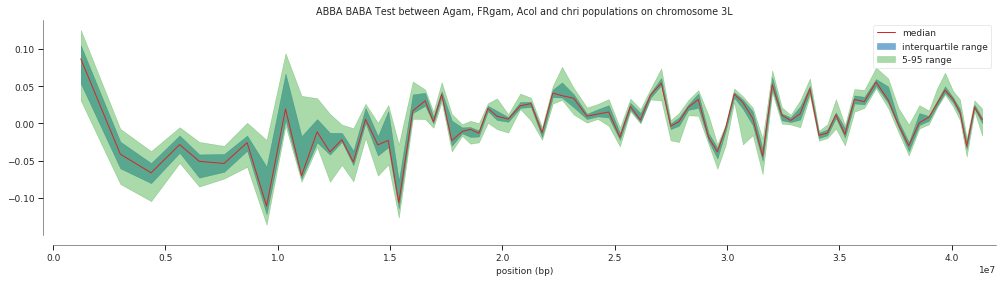

In [44]:
plot_test('3L', A,B,C,D, blen=100000)

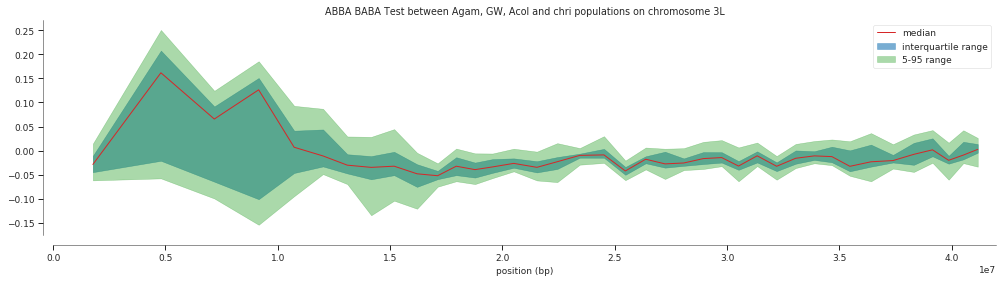

In [74]:
plot_test('3L', A,B,C,D, blen=200000)

## Using An.melas as outgroup:

In [76]:
A = an_gam
B = 'FRgam'
C = an_col
D = 'mela'

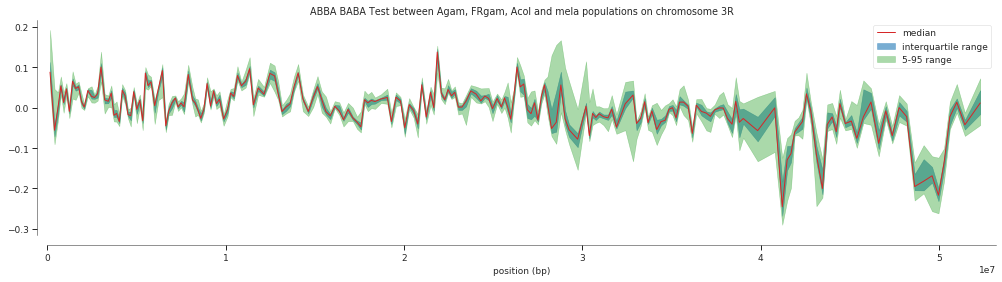

In [77]:
plot_test('3R', A,B,C,D, blen=50000)

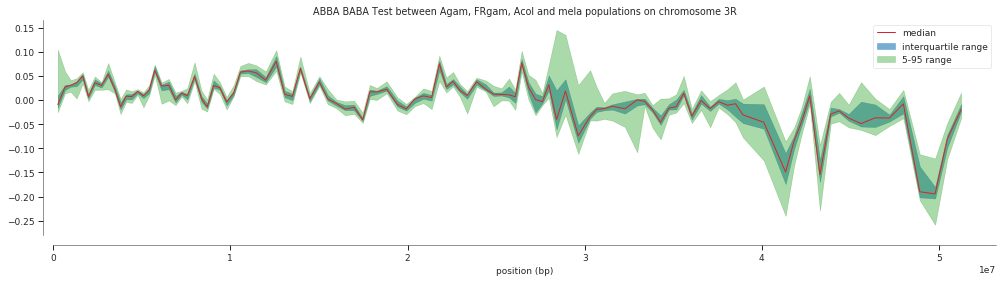

In [46]:
plot_test('3R', A,B,C,D, blen=100000)

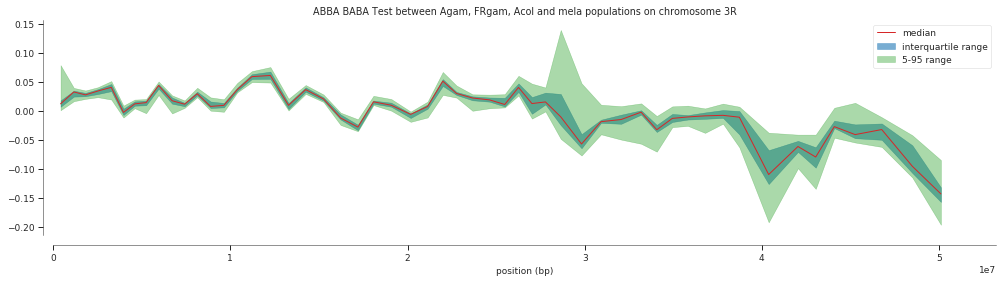

In [78]:
plot_test('3R', A,B,C,D, blen=200000)

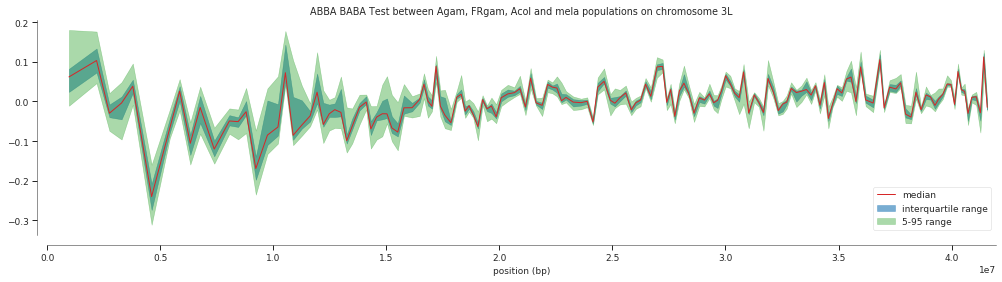

In [79]:
plot_test('3L', A,B,C,D, blen=50000)

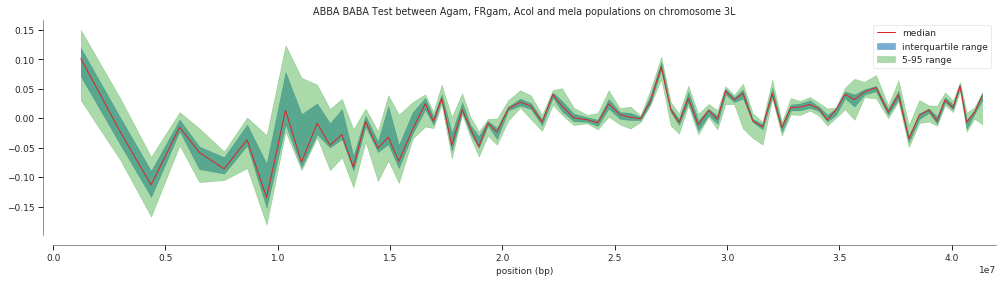

In [47]:
plot_test('3L', A,B,C,D, blen=100000)

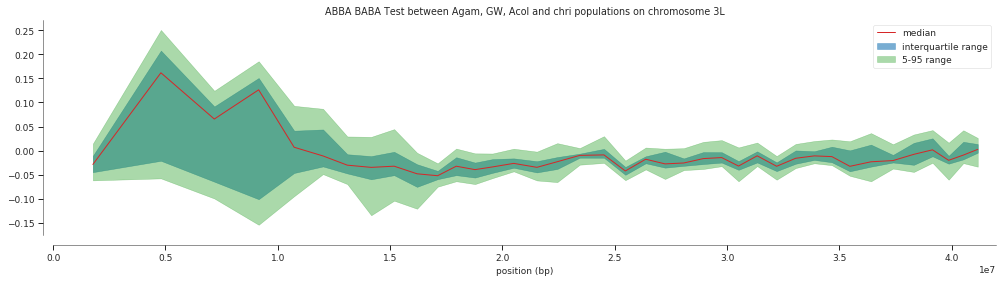

In [96]:
plot_test('3L', A,B,C,D, blen=200000)

-----------------------------------------

# Block analysis with Gabon
## Using <i>An.christyi</i> as outgroup:

In [81]:
A = an_gam
B = 'GAgam'
C = an_col
D = 'chri'

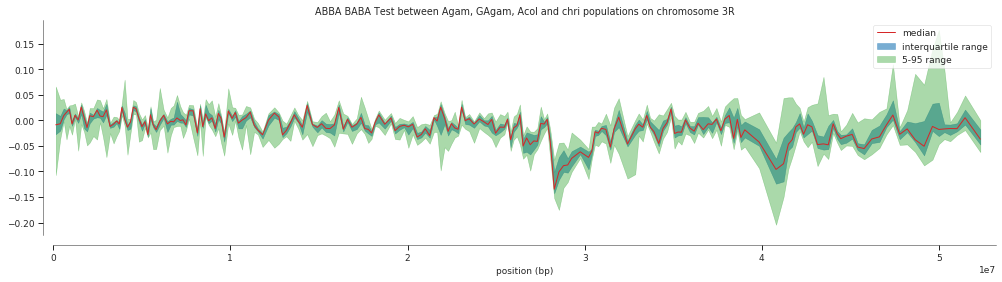

In [82]:
plot_test('3R', A,B,C,D, blen=50000)

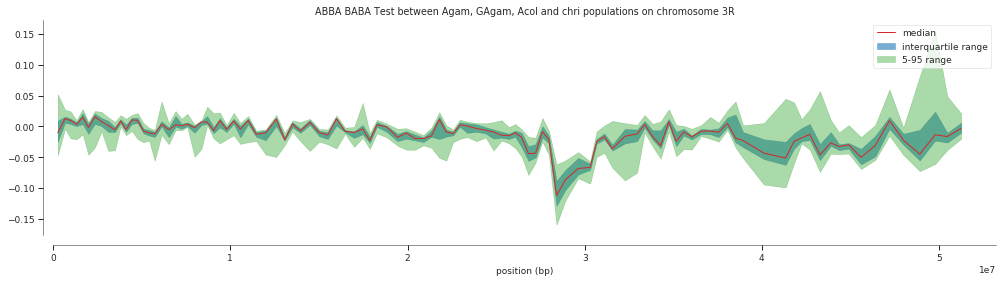

In [49]:
plot_test('3R', A,B,C,D, blen=100000)

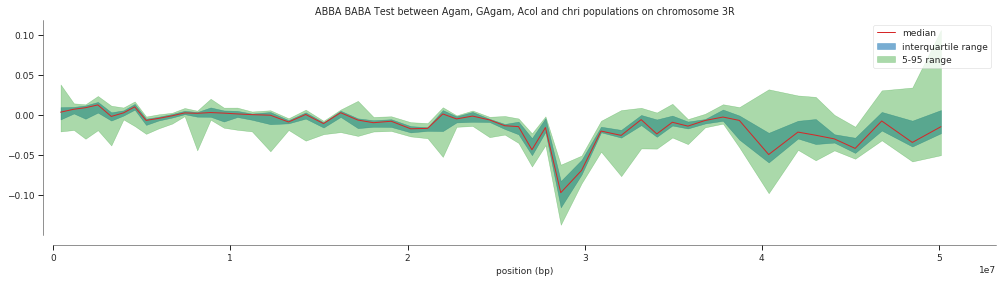

In [83]:
plot_test('3R', A,B,C,D, blen=200000)

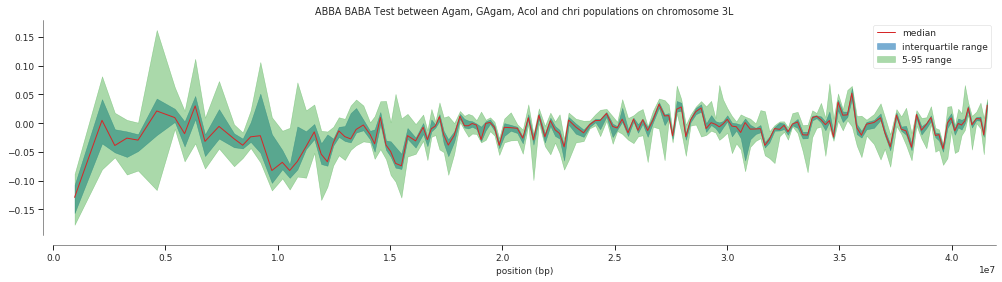

In [84]:
plot_test('3L', A,B,C,D, blen=50000)

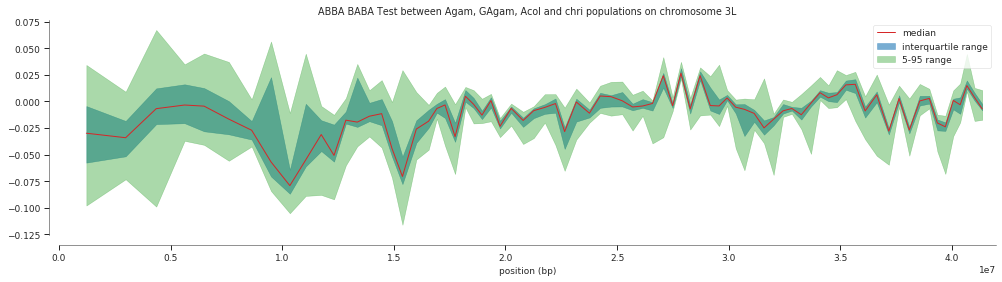

In [50]:
plot_test('3L', A,B,C,D, blen=100000)

The history saving thread hit an unexpected error (OperationalError('database or disk is full',)).History will not be written to the database.


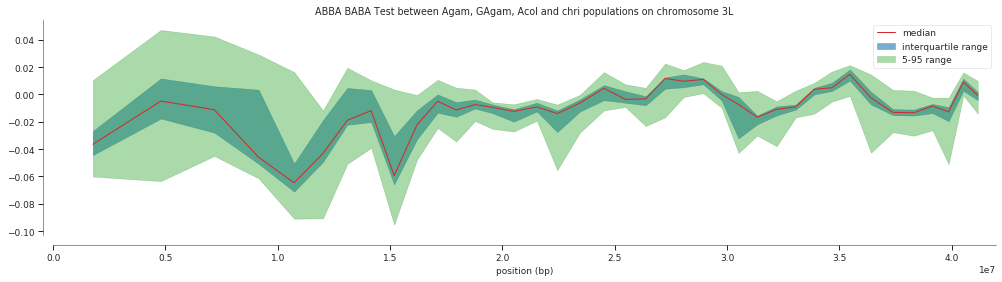

In [85]:
plot_test('3L', A,B,C,D, blen=200000)

## Using <i>An.melas</i> as outgroup:

In [86]:
A = an_gam
B = 'GAgam'
C = an_col
D = 'mela'

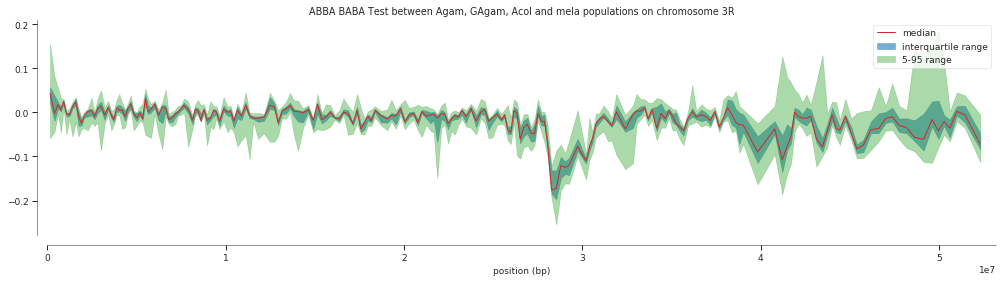

In [87]:
plot_test('3R', A,B,C,D, blen=50000)

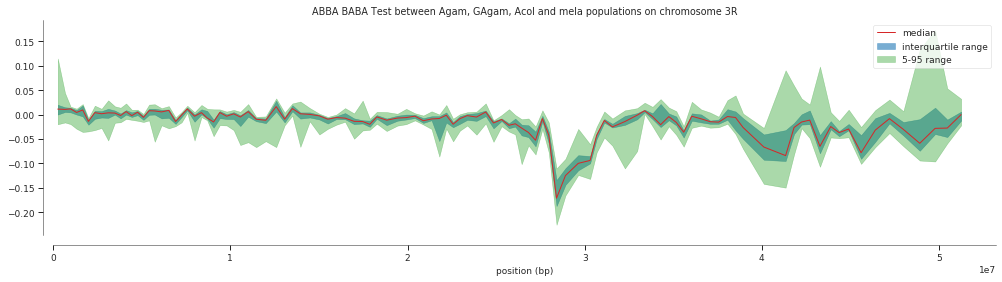

In [52]:
plot_test('3R', A,B,C,D, blen=100000)

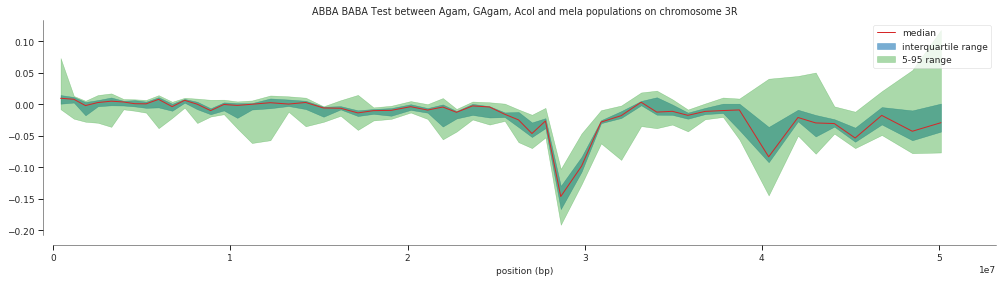

In [88]:
plot_test('3R', A,B,C,D, blen=200000)

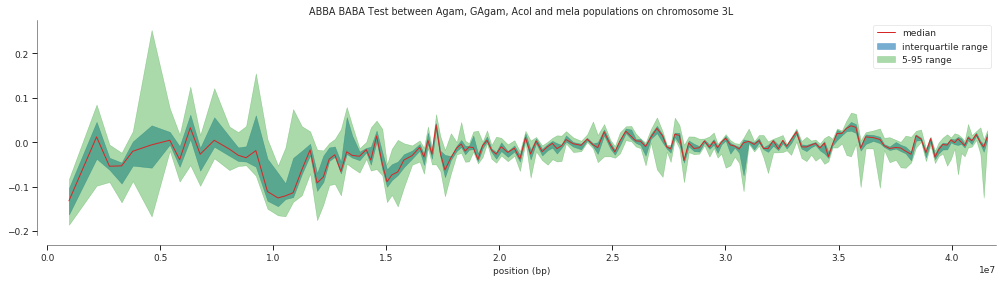

In [89]:
plot_test('3L', A,B,C,D, blen=50000)

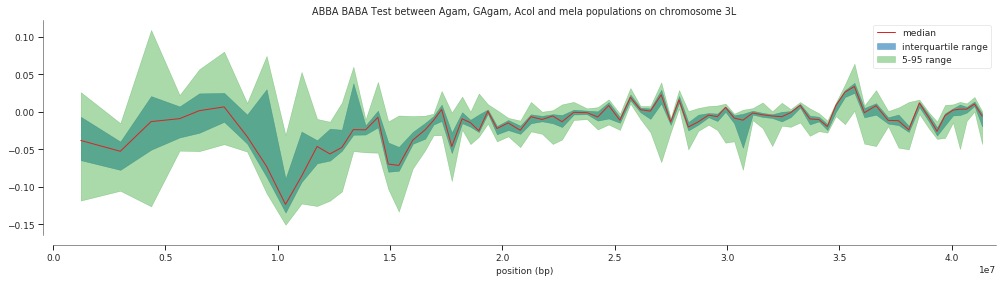

In [53]:
plot_test('3L', A,B,C,D, blen=100000)

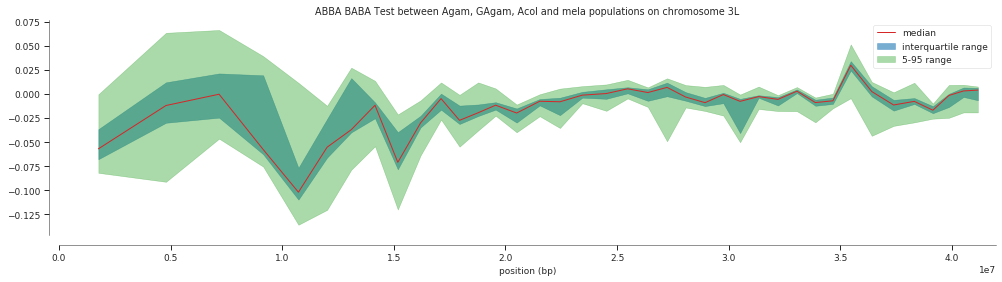

In [90]:
plot_test('3L', A,B,C,D, blen=200000)

# Block analysis with hybrid populations:

In [91]:
A = an_gam
B = an_na
C = an_col
D = 'chri'

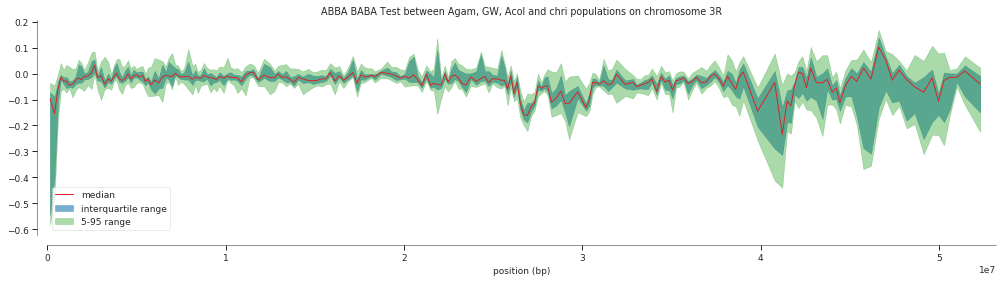

In [92]:
plot_test('3R', A,B,C,D, blen=50000)

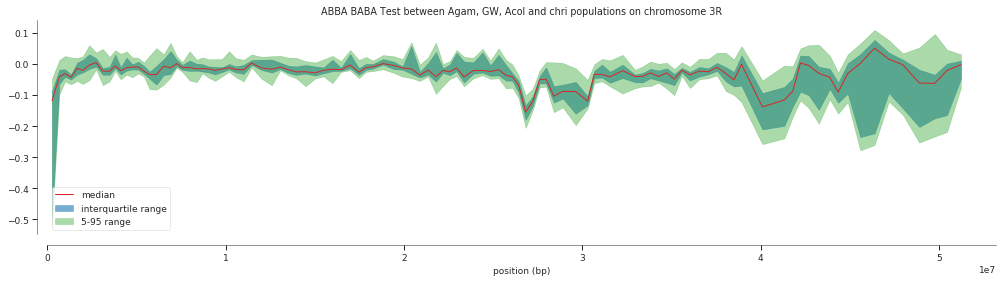

In [68]:
plot_test('3R', A,B,C,D, blen=100000)

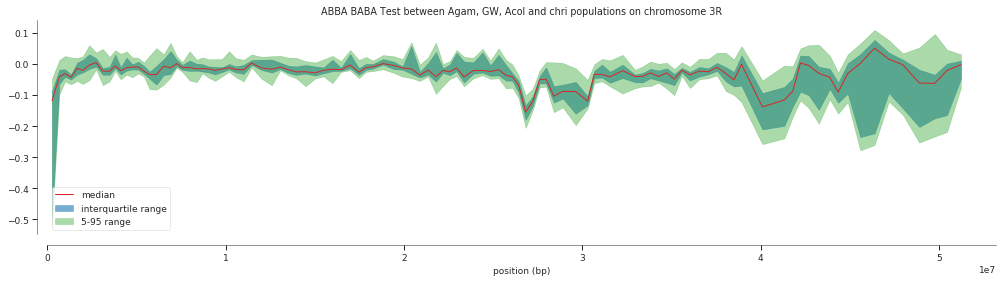

In [93]:
plot_test('3R', A,B,C,D, blen=100000)

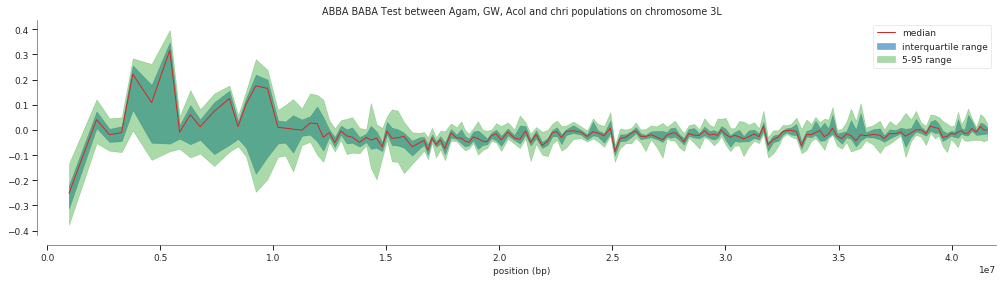

In [94]:
plot_test('3L', A,B,C,D, blen=50000)

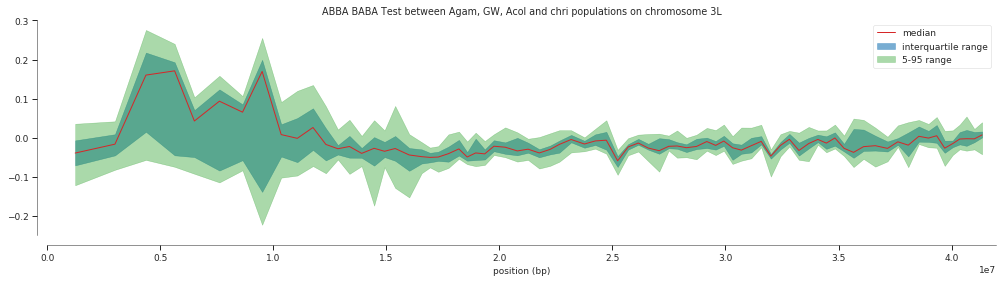

In [69]:
plot_test('3L', A,B,C,D, blen=100000)

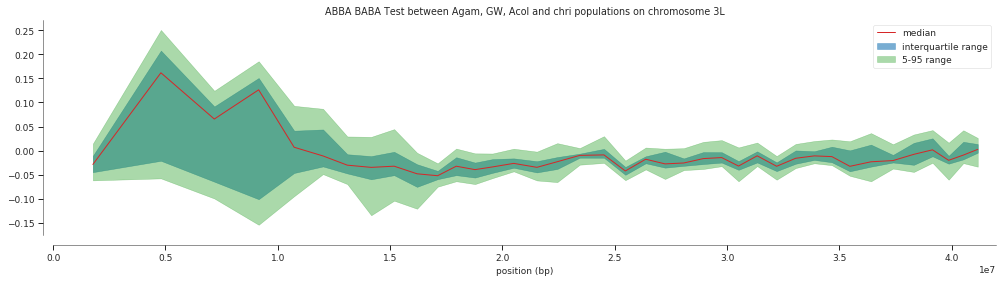

In [95]:
plot_test('3L', A,B,C,D, blen=200000)